In [1]:
from utils import *
from experiment import *

import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr
plt.style.use("light")

PATH = "/home/max/Temp/Praktikum/transversal/"
SAVE_PATH = "/home/max/Nextcloud/Praktikum/Report/figures/transversal/"
REPEAT = 3

# Single Experiment Run

(101, 1002, 3)


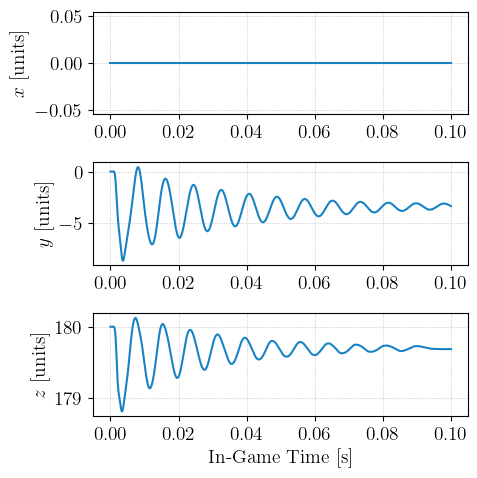

In [9]:
positions = read_json_file(PATH + "reference/reference/positions.json")

reference = GuidewireExperiment(positions)

fig, ax = plt.subplots(3,1,figsize=(5,5))

pos = reference.get_all_spheres()
time = reference.get_total_time()
print(pos.shape)

ax[0].plot(time, pos[-1,:,0], "-")
ax[0].set_ylabel("$x$ [units]")
ax[1].plot(time, pos[-1,:,1], "-")
ax[1].set_ylabel("$y$ [units]")
ax[2].plot(time, pos[-1,:,2], "-")
ax[2].set_ylabel("$z$ [units]")
ax[2].set_xlabel("In-Game Time [s]")
plt.tight_layout()

plt.savefig(SAVE_PATH + "reference.pdf", bbox_inches="tight", dpi=300)

# reference.plot_experiment(axis=2)
# #plt.savefig(SAVE_PATH + "experiment1.pdf", bbox_inches="tight", dpi=300)
# plt.show()

# reference.plot_all_spheres(axis=2)
# #plt.savefig(SAVE_PATH + "experiment1_2.pdf", bbox_inches="tight", dpi=300)
# plt.show()

# _ = get_decay_rate(reference, [1,1.5], debug=True, offset=1, save=False)

In [59]:
COLORS = ["#9e0142", "#d53e4f", "#f46d43", "#fdae61", "#fee08b", "#ffffbf", "#e6f598", "#abdda4", "#66c2a5", "#3288bd", "#5e4fa2"]

def plot_transversal(name, params, reference, xlabel, save=False, format="int"):
    total_error = []

    plt.figure(figsize=(4,3))

    for i,param in enumerate(params):
        try:
            positions = read_json_file(PATH + f"{name}_0/{name}_0_{param}/positions.json")

            experiment = GuidewireExperiment(positions)

            # Get distance to reference
            pos_ref = reference.get_all_spheres()[::(reference.n_spheres-1)//(experiment.n_spheres-1)]
            pos = experiment.get_all_spheres()
            dist = np.linalg.norm(pos_ref - pos, axis=2)
            
            # Save average distance
            total_error.append(np.mean(dist))

            if format == "int":
                plt.plot(dist[:,-1], "o-", label=f"{int(param)}", color=COLORS[i])
            if format == "sci":
                plt.plot(dist[:,-1], "o-", label=f"{param:.2e}", color=COLORS[i])
            if format == "float":
                plt.plot(dist[:,-1], "o-", label=f"{param:.2f}", color=COLORS[i])
            plt.title(xlabel)
            plt.ylabel("Distance [units]")
            plt.xlabel("Sphere Index $i$")
        except Exception as e:
            print(f"Error in {param}")
            print(e)
        
    plt.legend(prop={"size": 8})
    if save:
        plt.savefig(SAVE_PATH + f"{name}_distance.pdf", bbox_inches="tight", dpi=300)
    plt.show()
    
    plt.figure(figsize=(4,3))
    plt.imshow(dist, aspect="auto", cmap=cmr.lavender, extent=[0, experiment.get_total_time()[-1], experiment.n_spheres, 0], interpolation="bicubic")
    #plt.title("Time-Evolution of Distance to Reference")
    plt.xlabel("In-Game Time [s]")
    plt.ylabel("Sphere Index $i$")
    plt.colorbar(label="Distance [units]")
    if save:
        plt.savefig(SAVE_PATH + f"{name}_heatmap.pdf", bbox_inches="tight", dpi=300)
    plt.show()
    
    plt.figure(figsize=(4,3))
    plt.plot(params, total_error, "o-")
    plt.title("Average Distance to Reference")
    plt.ylabel("Distance [units]")
    plt.xlabel(xlabel)
    if save:
        plt.savefig(SAVE_PATH + f"{name}_error.pdf", bbox_inches="tight", dpi=300)
    plt.show()

# Constraint Solver Steps

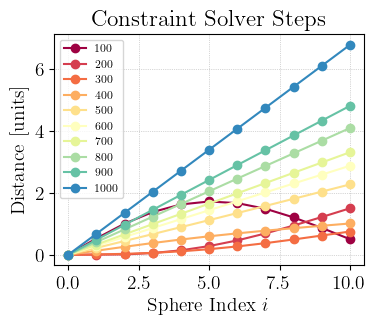

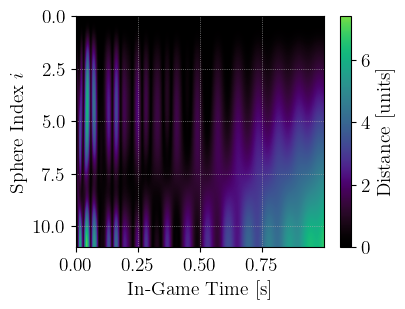

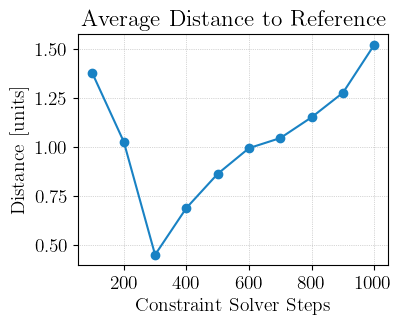

In [60]:
constraint_solver_steps = np.arange(100,1100,100)

plot_transversal("constraint_solver_steps", constraint_solver_steps, reference, xlabel="Constraint Solver Steps", save=True, format="int")

# Time steps

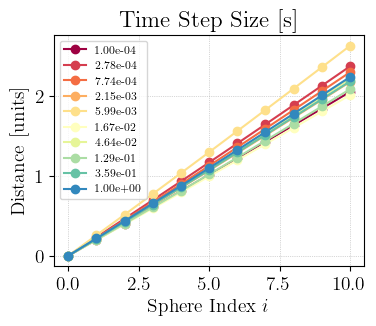

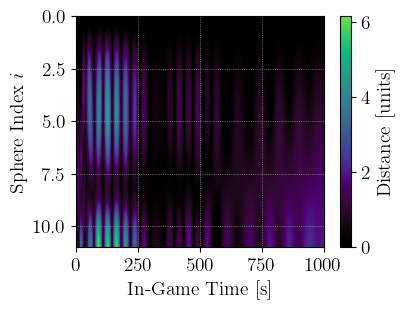

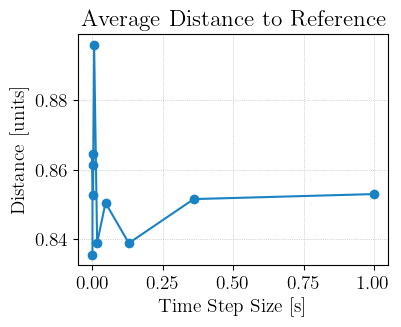

In [61]:
timesteps = np.logspace(-4, 0, 10)

plot_transversal("time_steps", timesteps, reference, xlabel="Time Step Size [s]", save=True, format="sci")

# Number of Rod Elements

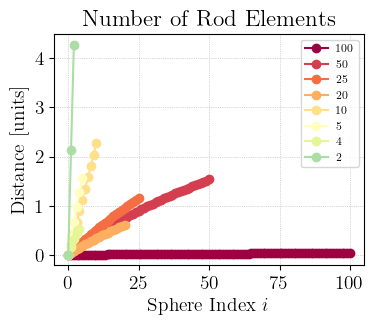

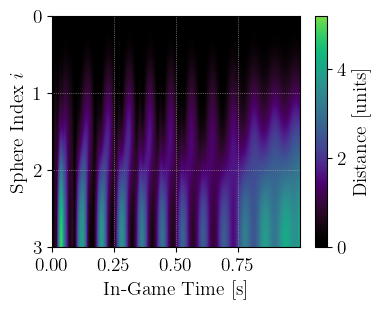

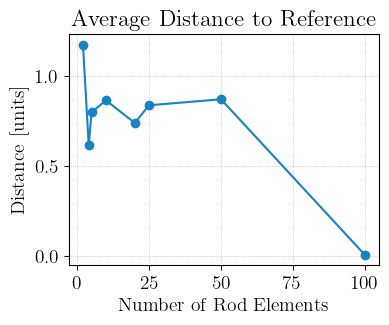

In [62]:
elements = [100, 50, 25, 20, 10, 5, 4, 2]

plot_transversal("rod_elements", elements, reference, xlabel="Number of Rod Elements", save=True, format="int")

# Displacement

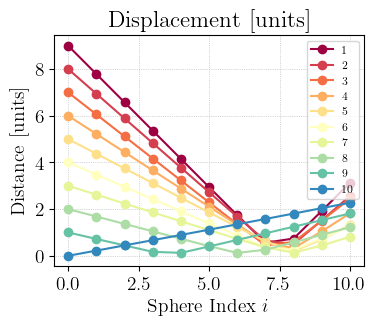

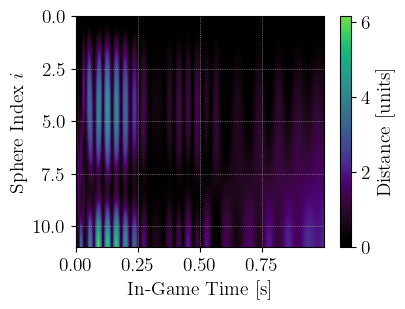

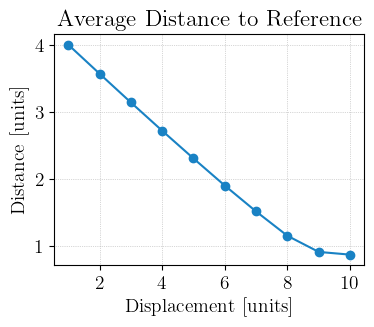

In [63]:

displacements = np.linspace(1,10, 10)

plot_transversal("displacemen", displacements, reference, xlabel="Displacement [units]", save=True, format="int")

# Total mass

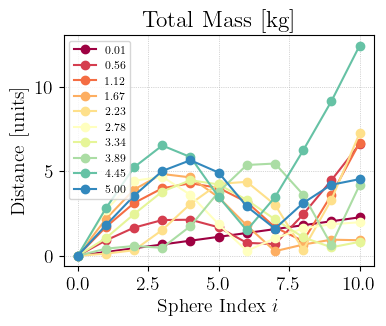

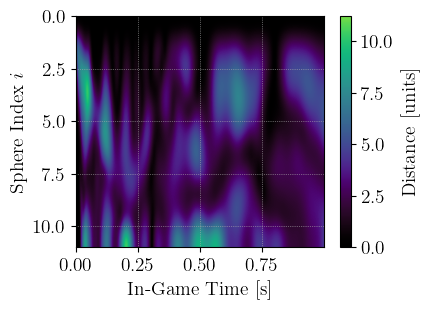

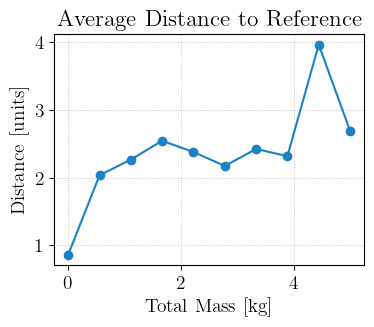

In [64]:
masses = np.linspace(0.01,5,10)

plot_transversal("total_mass", masses, reference, xlabel="Total Mass [kg]", save=True, format="float")